<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Load-the-data-into-a-dataframe" data-toc-modified-id="Load-the-data-into-a-dataframe-0.1">Load the data into a dataframe</a></span></li></ul></li><li><span><a href="#Pre-processing" data-toc-modified-id="Pre-processing-1">Pre-processing</a></span><ul class="toc-item"><li><span><a href="#Determine-sentiment-polarity" data-toc-modified-id="Determine-sentiment-polarity-1.1">Determine sentiment polarity</a></span></li></ul></li></ul></div>

In [1]:
#from google.colab import drive
#drive.mount('/content/drive')

### Load the data into a dataframe

In [2]:
!pip install contractions
!pip install pyspellchecker

import pandas as pd
import numpy
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (10.0, 6.0)

from sklearn.feature_extraction.text import CountVectorizer
import contractions
from collections import Counter
#from pyspellchecker import SpellChecker
import string
import re
from textblob import TextBlob

import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize

[nltk_data] Downloading package punkt to /Users/jimcody/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/jimcody/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [3]:
latuda = pd.read_csv('https://raw.githubusercontent.com/jimcody2014/nlp_cdc/main/data/latuda.csv')
latuda.head()

,drugName,condition,review,rating,date,usefulCount
0,Latuda,Bipolar Disorde,"""I have had great experience so far with Latud...",8,20-Feb-12,39
1,Latuda,Bipolar Disorde,"""I've taken a lot of medications. I was prescr...",3,28-Oct-16,25
2,Latuda,Bipolar Disorde,"""I was deeply suicidal for 15 years with repet...",9,25-Dec-15,33
3,Latuda,Bipolar Disorde,"""I have been taking Latuda 80 mg for 8 months ...",3,23-Apr-13,34
4,Latuda,Schizophrenia,"""We've heard of the Latuda 20-40 mg restlessne...",9,5-Feb-16,15


## Pre-processing

In [4]:
def clean_text_round1(text):  
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub('[‘’“”…]', '', text)
    text = re.sub('\n', '', text)
    return text

In [5]:
round1 = lambda x: clean_text_round1(x)

# Let's take a look at the updated text
latuda.review = pd.DataFrame(latuda.review.apply(round1))
latuda.head()

,drugName,condition,review,rating,date,usefulCount
0,Latuda,Bipolar Disorde,i have had great experience so far with latuda...,8,20-Feb-12,39
1,Latuda,Bipolar Disorde,ive taken a lot of medications i was prescribe...,3,28-Oct-16,25
2,Latuda,Bipolar Disorde,i was deeply suicidal for years with repetiti...,9,25-Dec-15,33
3,Latuda,Bipolar Disorde,i have been taking latuda mg for months and ...,3,23-Apr-13,34
4,Latuda,Schizophrenia,weve heard of the latuda mg restlessnesssense...,9,5-Feb-16,15


In [6]:
# Add a column 'target' based on the rating column
latuda['target'] = latuda['rating'].apply(lambda x: 'Good' if x >= 6 else 'Bad')

# This is new!

### Determine sentiment polarity

In [7]:
# New column for sentiment polarity. Two new columns for lengths of the review and word count.
latuda['polarity'] = latuda['review'].map(lambda text: TextBlob(text).sentiment.polarity)
latuda['review_len'] = latuda['review'].astype(str).apply(len)
latuda['word_count'] = latuda['review'].apply(lambda x: len(str(x).split()))
latuda.head()

,drugName,condition,review,rating,date,usefulCount,target,polarity,review_len,word_count
0,Latuda,Bipolar Disorde,i have had great experience so far with latuda...,8,20-Feb-12,39,Good,0.170000,564,109
1,Latuda,Bipolar Disorde,ive taken a lot of medications i was prescribe...,3,28-Oct-16,25,Bad,0.377222,298,61
2,Latuda,Bipolar Disorde,i was deeply suicidal for years with repetiti...,9,25-Dec-15,33,Good,-0.040427,719,137
3,Latuda,Bipolar Disorde,i have been taking latuda mg for months and ...,3,23-Apr-13,34,Bad,0.185119,672,123
4,Latuda,Schizophrenia,weve heard of the latuda mg restlessnesssense...,9,5-Feb-16,15,Good,0.175000,428,72


In [8]:
print('5 random reviews with the highest positive sentiment polarity: \n')
polarity_max = latuda.polarity.max()
polarity_mean = latuda.polarity.mean()
polarity_median = latuda.polarity.median()
polarity_mode = latuda.polarity.mode()
polarity_min = latuda.polarity.min()

print(polarity_max)
print(polarity_mean)
print(polarity_median)
print(polarity_mode)
print(polarity_min)

5 random reviews with the highest positive sentiment polarity: 

0.8
0.06861209701462832
0.08500000000000002
0    0.0
dtype: float64
-0.9


In [9]:
print(latuda.loc[latuda.polarity == 0.8])

    drugName        condition  \
131   Latuda  Bipolar Disorde   

                                                review  rating       date  \
131  i had been on latuda for two months  great med...       1  29-Nov-11   

     usefulCount target  polarity  review_len  word_count  
131           38    Bad       0.8          87          16  


### Distribution of review polarity scores

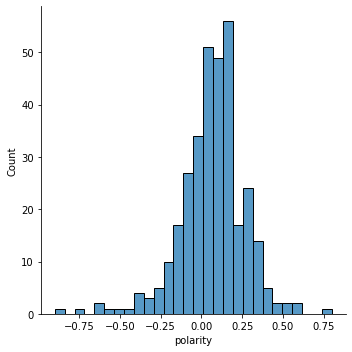

In [10]:
sns.displot(data=latuda,x='polarity')

### Distribution of Ratings

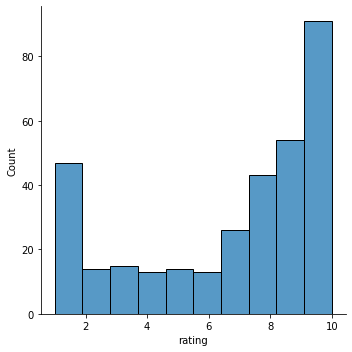

In [11]:
sns.displot(data=latuda,x='rating')

### Distribution of polarity by rating

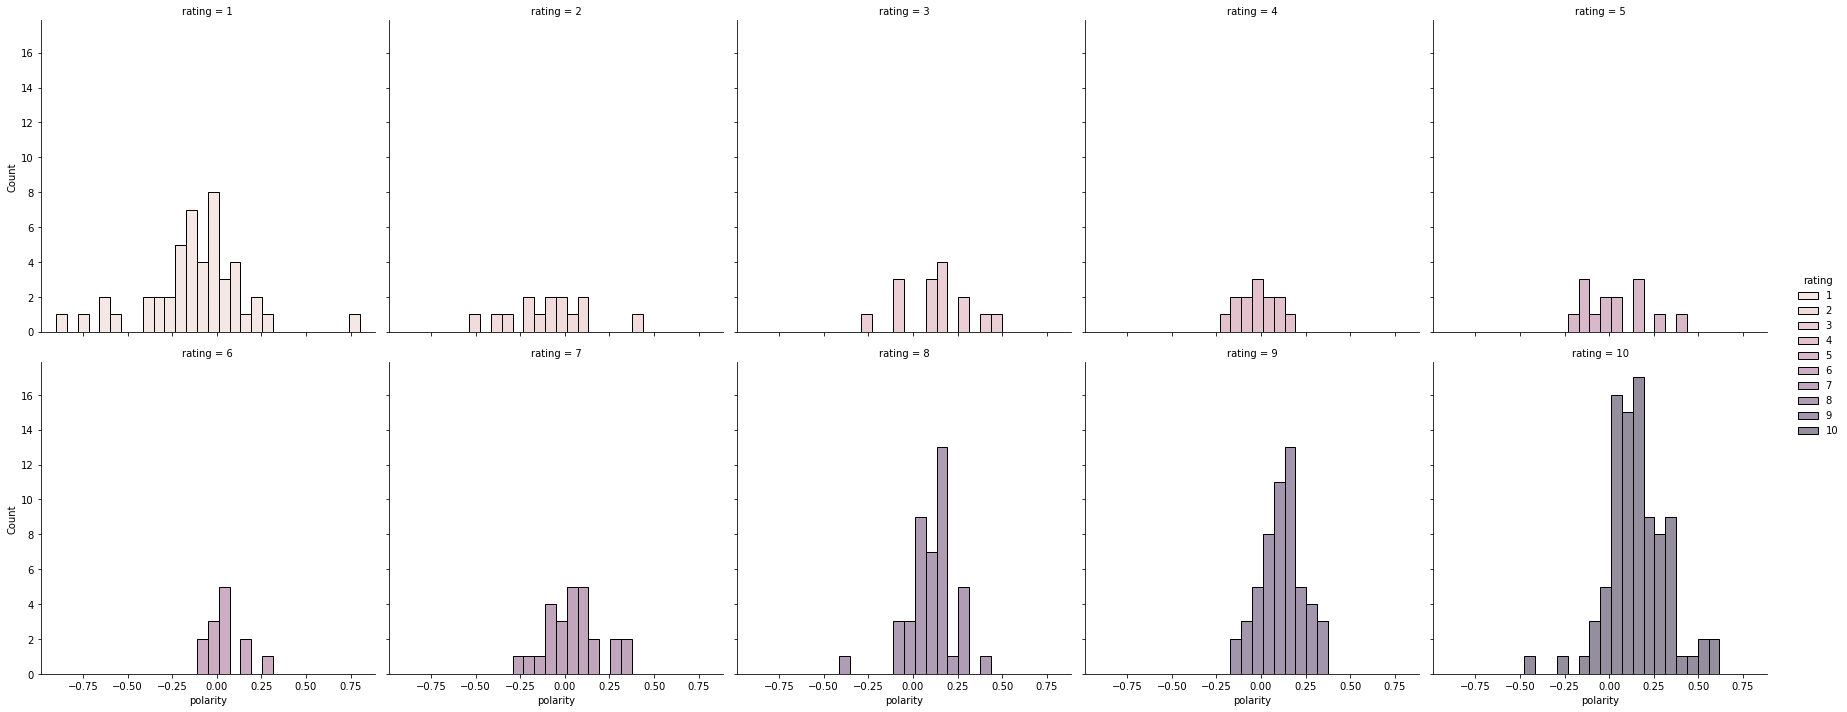

In [12]:
sns.displot(data=latuda, x="polarity", hue="rating", col="rating", col_wrap =5, kind = 'hist')

### Distribution of polarity by condition

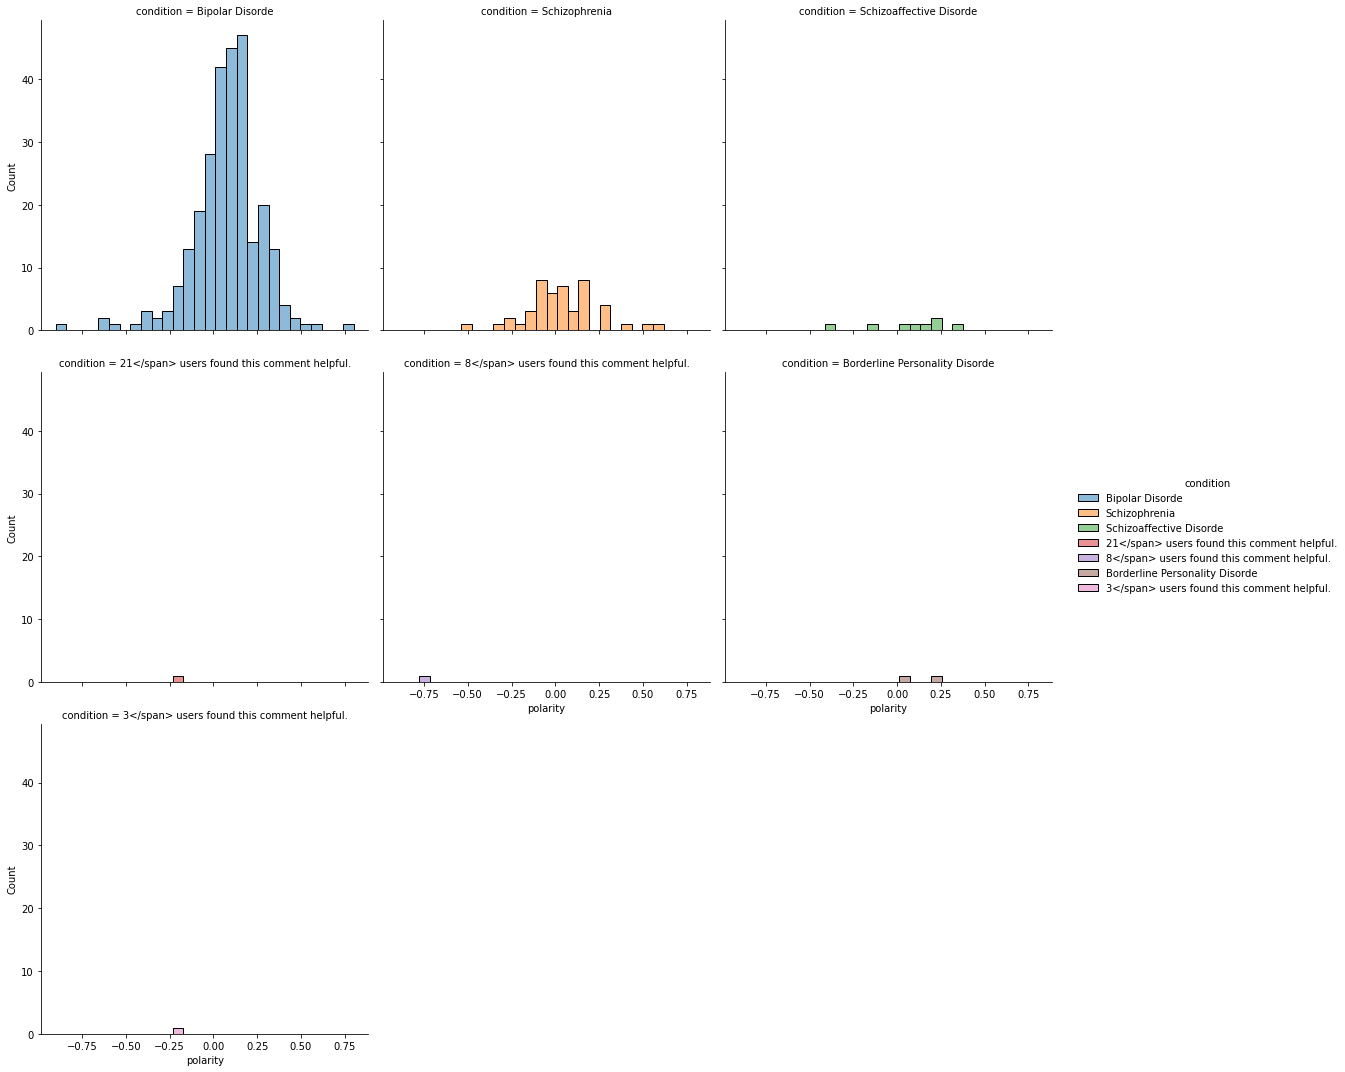

In [13]:
sns.displot(data=latuda, x="polarity", hue="condition", col="condition", col_wrap =3, kind = 'hist')

### Distribution by review length

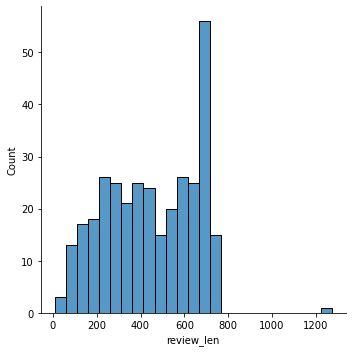

In [14]:
sns.displot(data=latuda,x='review_len', bins = 25)

### Distribution by word count

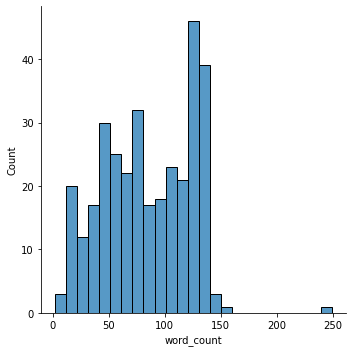

In [15]:
sns.displot(data=latuda,x='word_count', bins = 25)

### Density plots

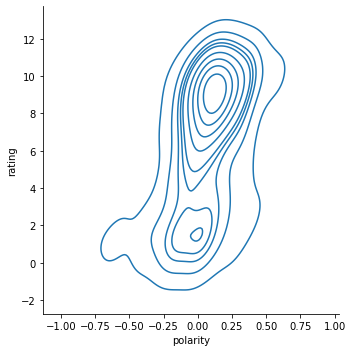

In [16]:
sns.displot(data=latuda, x="polarity", y='rating', kind ='kde')

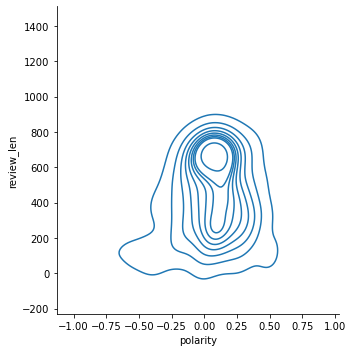

In [17]:
sns.displot(data=latuda, x="polarity", y='review_len', kind ='kde')

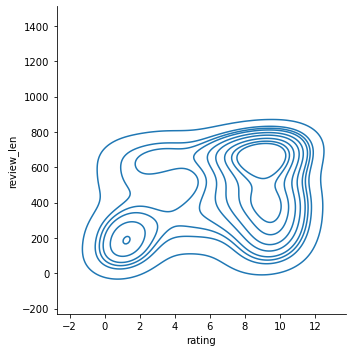

In [18]:
sns.displot(data=latuda, x="rating", y='review_len', kind ='kde')

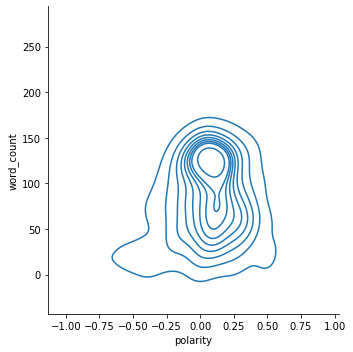

In [19]:
sns.displot(data=latuda, x="polarity", y='word_count', kind ='kde')

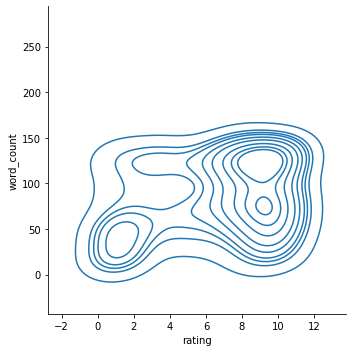

In [20]:
sns.displot(data=latuda, x="rating", y='word_count', kind ='kde')

# Vectorization

Vectorization - turn a list of words into an array of numbers (aka - document matrix) (See bag of words example below)

- Bag of Words:
    - A dictionary of unique words contained in the text, and then finds the count of each word within the text.
    - Does not preserve the order of the words.
- TD-IDF (term frequency-inverse document frequency):
    - Similar to BOW, except the value in each column for each row is scaled by the number of terms in the document and the relative rarity of the word. 
    - Term frequency equals the number of times a word appears in a document divided by the total number of words in the document. 
    - Inverse document frequency calculates the weight of rare words in all documents in the corpus, with rare words having a high IDF score, and words that are present in all documents in a corpus having IDF close to zero. 
    - Allows words that have a. lot of meaning to carry more weight, even if they appear rarely in the document.
- Word2Vec:
    - A neural network approach.
    - Calculates the cosine similarity between two words, and plots words in space so that similar words are grouped together

### Bag of Words

In [39]:
phrase = ['coronavirus is a highly infectious disease',
   'coronavirus affects older people the most', 
   'older people are at high risk due to this disease']
cv = CountVectorizer()        # Count Vectorizer automatically tokenizes and counts words
x = cv.fit_transform(phrase)  # creates the bag of words
# x is the bag of words

Short article on fit_transform & transform

https://towardsdatascience.com/what-and-why-behind-fit-transform-vs-transform-in-scikit-learn-78f915cf96fe

In [22]:
x = x.toarray()
x

# Three phrases results in an array with 3 lists
# The sorted vacabulary let's us know which column is associated with each word.
# For example, column 4 is the word coronavirus.  Pharases 1 & 2 contain the word coronavirus.

array([[0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0],
       [0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1]])

In [23]:
sorted(cv.vocabulary_.keys())

['affects',
 'are',
 'at',
 'coronavirus',
 'disease',
 'due',
 'high',
 'highly',
 'infectious',
 'is',
 'most',
 'older',
 'people',
 'risk',
 'the',
 'this',
 'to']

In [24]:
cv = CountVectorizer(ngram_range=(2,2))
y = cv.fit_transform(phrase) 
y = y.toarray()
y


array([[0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0],
       [0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1]])

In [25]:
sorted(cv.vocabulary_.keys())

['affects older',
 'are at',
 'at high',
 'coronavirus affects',
 'coronavirus is',
 'due to',
 'high risk',
 'highly infectious',
 'infectious disease',
 'is highly',
 'older people',
 'people are',
 'people the',
 'risk due',
 'the most',
 'this disease',
 'to this']

## N-grams

### Top unigrams before removing stop words

In [26]:
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_words(latuda['review'], 20)
for word, freq in common_words:
    print(word, freq)
df1 = pd.DataFrame(common_words, columns = ['review' , 'count'])

and 931
to 713
the 689
it 622
my 582
for 458
of 382
have 379
latuda 373
was 354
me 343
on 335
with 303
but 272
in 264
this 256
is 256
been 227
that 214
at 199


<AxesSubplot:xlabel='count', ylabel='review'>

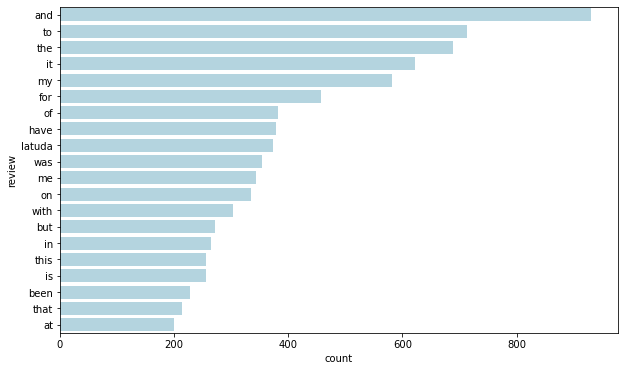

In [27]:
sns.barplot(x="count", y="review", data=df1, color = 'lightblue')

### Top unigrams after removing stop words

In [28]:
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer(stop_words = 'english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_words(latuda['review'], 20)
#for word, freq in common_words:
#    print(word, freq)
df2 = pd.DataFrame(common_words, columns = ['review' , 'count'])

<AxesSubplot:xlabel='count', ylabel='review'>

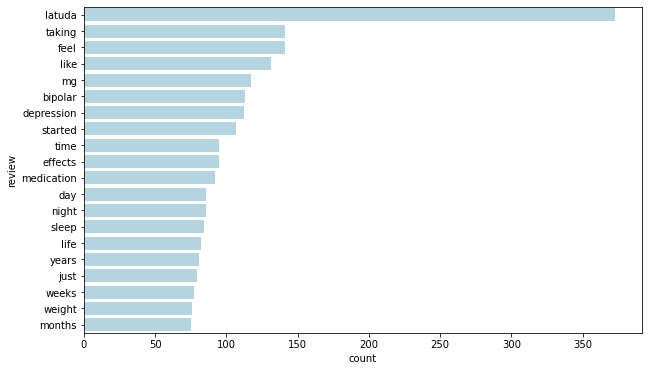

In [29]:
sns.barplot(x="count", y="review", data=df2, color = 'lightblue')

### Top bigrams before removing stop words

In [30]:
def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_bigram(latuda['review'], 20)
#for word, freq in common_words:
#    print(word, freq)
df3 = pd.DataFrame(common_words, columns = ['review' , 'count'])

<AxesSubplot:xlabel='count', ylabel='review'>

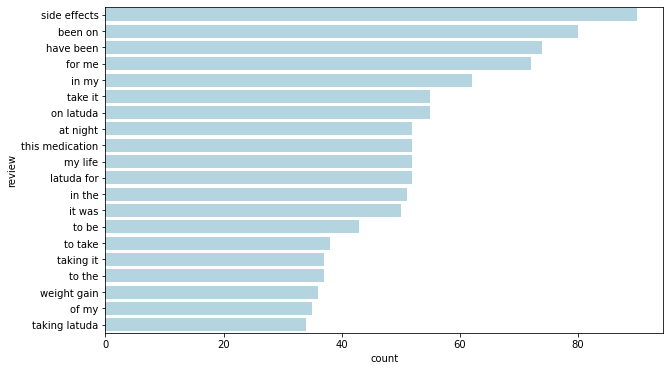

In [31]:
sns.barplot(x="count", y="review", data=df3, color = 'lightblue')

### Top bigrams after removing stop words

In [32]:
def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_bigram(latuda['review'], 20)
#for word, freq in common_words:
#    print(word, freq)
df4 = pd.DataFrame(common_words, columns = ['review' , 'count'])

<AxesSubplot:xlabel='count', ylabel='review'>

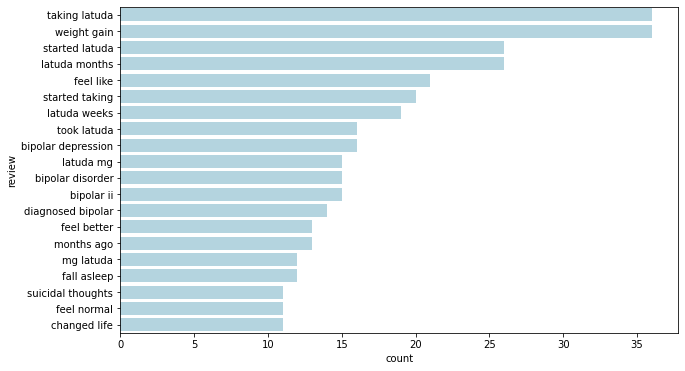

In [33]:
sns.barplot(x="count", y="review", data=df4, color = 'lightblue')

### Top trigrams before removing stop words

In [34]:
def get_top_n_trigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(3, 3)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_trigram(latuda['review'], 20)
#for word, freq in common_words:
#    print(word, freq)
df5 = pd.DataFrame(common_words, columns = ['review' , 'count'])

<AxesSubplot:xlabel='count', ylabel='review'>

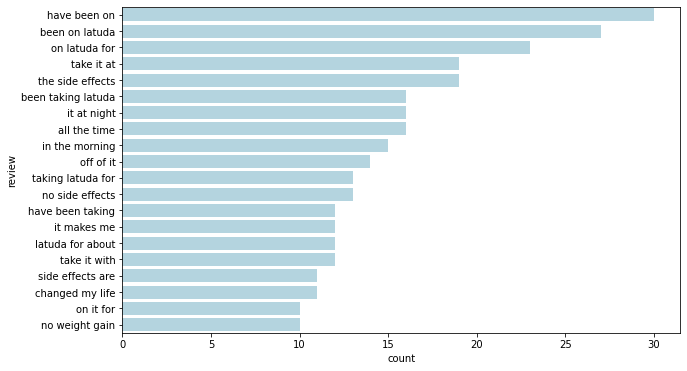

In [35]:
sns.barplot(x="count", y="review", data=df5, color = 'lightblue')

### Top trigrams after removing stop words

In [36]:
def get_top_n_trigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(3, 3), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_trigram(latuda['review'], 20)
#for word, freq in common_words:
#    print(word, freq)
df6 = pd.DataFrame(common_words, columns = ['review' , 'count'])

<AxesSubplot:xlabel='count', ylabel='review'>

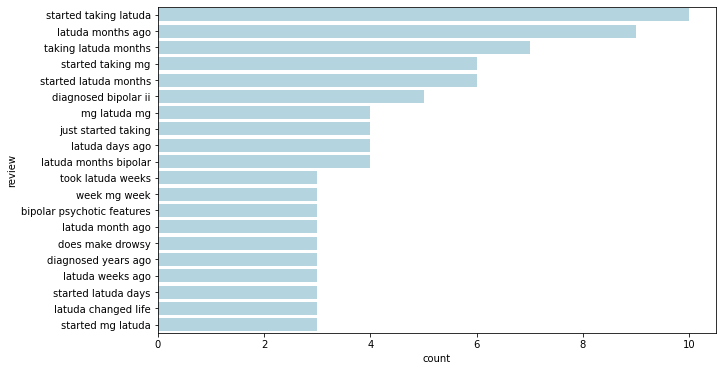

In [37]:
sns.barplot(x="count", y="review", data=df6, color = 'lightblue')

### Top 10 Parts of Speech

- Useful because the same word with a different part of speech can have two completely different meanings
- POS tagging should be done straight after tokenization and before any words are removed so that sentence structure is preserved and it is more obvious what part of speech the word belongs to

<AxesSubplot:xlabel='pos', ylabel='count'>

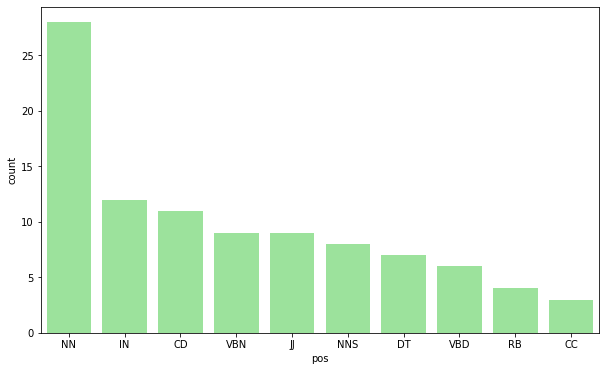

In [40]:
blob = TextBlob(str(latuda['review']))
pos_latuda = pd.DataFrame(blob.tags, columns = ['word' , 'pos'])
sns.countplot(x="pos", data=pos_latuda, color = 'lightgreen', order = pos_latuda['pos'].value_counts()[:10].index)

# nltk: nltk.pos_tag(blob)